In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam,SGD

In [3]:
feature_file=pd.read_csv('audio_data/feature/final_feature.csv').values

In [4]:
target_file=pd.read_csv('audio_data/feature/final_targets.csv').values

In [5]:
feature_file.shape

(259161, 40)

In [6]:
target_file.shape

(301, 1)

In [7]:
feature_file=feature_file.reshape(301,861,40)

In [8]:
feature_file.shape

(301, 861, 40)

In [20]:
ohe=OneHotEncoder(categories='auto')
onehot_target=ohe.fit_transform(target_file.reshape(-1,1)).todense()
print(onehot_target.shape)

(301, 3)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(feature_file, onehot_target, test_size=0.33, random_state=42)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(861,40)),
    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(64,activation=tf.nn.relu),
    tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 34440)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              35267584  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

In [42]:
adam=Adam(lr=0.001,decay=0.0001)
sgd=SGD(lr=0.001,decay=0.0001)

In [44]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',
             metrics=['acc'])

In [45]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 201 samples, validate on 100 samples
Epoch 1/10
201/201 [==============================] - 2s 9ms/sample - loss: 5.3354 - acc: 0.5622 - val_loss: 3.6519 - val_acc: 0.5200
Epoch 2/10
201/201 [==============================] - 1s 7ms/sample - loss: 1.8159 - acc: 0.6169 - val_loss: 1.5910 - val_acc: 0.4700
Epoch 3/10
201/201 [==============================] - 1s 7ms/sample - loss: 2.3542 - acc: 0.6119 - val_loss: 1.6377 - val_acc: 0.4800
Epoch 4/10
201/201 [==============================] - 1s 7ms/sample - loss: 0.9159 - acc: 0.7114 - val_loss: 1.6210 - val_acc: 0.5200
Epoch 5/10
201/201 [==============================] - 1s 7ms/sample - loss: 1.2046 - acc: 0.6915 - val_loss: 2.9754 - val_acc: 0.3700
Epoch 6/10
201/201 [==============================] - 1s 7ms/sample - loss: 0.8543 - acc: 0.7413 - val_loss: 1.4369 - val_acc: 0.5000
Epoch 7/10
201/201 [==============================] - 1s 7ms/sample - loss: 0.2402 - acc: 0.9204 - val_loss: 1.8978 - val_acc: 0.4700
Epoch 8/10
201/2

In [47]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [48]:
import matplotlib.pyplot as plt

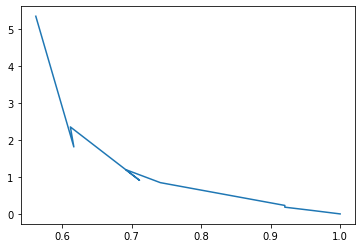

In [51]:
plt.plot(history.history['acc'],history.history['loss'])